In [15]:
import matplotlib.pyplot as plt
import pandas as pd

seqDf = pd.read_csv('out1Seq.txt', sep=',')
cudDf = pd.read_csv('out1Cuda.txt', sep=',')
clDf = pd.read_csv('out1CL.txt', sep=',')

In [20]:
import numpy as np

n = cudDf["n"].drop_duplicates().to_numpy()
avgDf = pd.DataFrame(columns=["Sequential","Cuda 64 threads","OpenCL 64 threads","Cuda 128 threads","OpenCL 128 threads"], index=n)

for i in n:
    print(i)
    avgSeq = 0
    avgCud64 = 0
    avgCL64 = 0
    avgCud128 = 0
    avgCL128 = 0

    if i <= 256:
        for index, row in seqDf.loc[seqDf["n"] == i].iterrows():
            avgSeq += row["time"]
        avgSeq /= len(seqDf.loc[seqDf["n"] == i])
        avgSeq /= 1000

    for index, row in cudDf.loc[(cudDf["n"] == i) & (cudDf["threads"] == 64)].iterrows():
        avgCud64 += row["time"]
    avgCud64 /= len(cudDf.loc[(cudDf["n"] == i) & (cudDf["threads"] == 64)])
    avgCud64 /= 1000

    for index, row in cudDf.loc[(cudDf["n"] == i) & (cudDf["threads"] == 128)].iterrows():
        avgCud128 += row["time"]
    avgCud128 /= len(cudDf.loc[(cudDf["n"] == i) & (cudDf["threads"] == 128)])
    avgCud128 /= 1000

    for index, row in clDf.loc[(clDf["n"] == i) & (clDf["threads"] == 64)].iterrows():
        avgCL64 += row["time"]
    avgCL64 /= len(clDf.loc[(clDf["n"] == i) & (clDf["threads"] == 64)])
    avgCL64 /= 1000

    for index, row in clDf.loc[(clDf["n"] == i) & (clDf["threads"] == 128)].iterrows():
        avgCL128 += row["time"]
    avgCL128 /= len(clDf.loc[(clDf["n"] == i) & (clDf["threads"] == 128)])
    avgCL128 /= 1000

    avgDf.loc[i] = {"Sequential": avgSeq,"Cuda 64 threads": avgCud64,"OpenCL 64 threads": avgCL64,"Cuda 128 threads": avgCud128,"OpenCL 128 threads": avgCL128}


display(avgDf)

16
32
64
128
256
512
1024
2048
4096


,Sequential,Cuda 64 threads,OpenCL 64 threads,Cuda 128 threads,OpenCL 128 threads
16,20.9176,41.4198,34.106,59.386,43.4714
32,78.4168,52.166,63.6676,95.9318,74.0138
64,302.4578,68.5966,61.7852,115.8028,106.4522
128,1179.4948,126.9118,116.8574,218.4274,151.2924
256,4660.1444,324.3852,220.391,429.166,297.1592
512,0.0,572.09,430.2032,846.6642,587.3172
1024,0.0,970.2258,852.6904,1686.5792,1164.2938
2048,0.0,1981.1168,2333.6022,3391.995,2332.8306
4096,0.0,6801.0844,6808.091,6800.7942,9058.0518


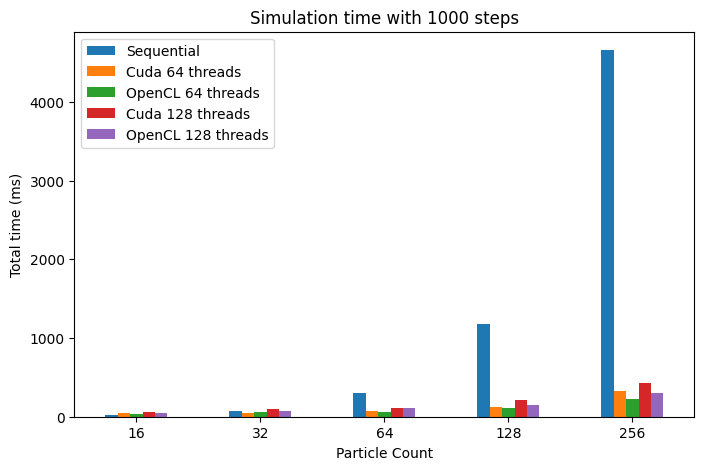

In [21]:
a1_1 = avgDf.loc[[16, 32, 64, 128, 256]].plot(kind='bar', rot=0, xlabel='Particle Count', ylabel='Total time (ms)', title='Simulation time with 1000 steps', figsize=(8, 5))

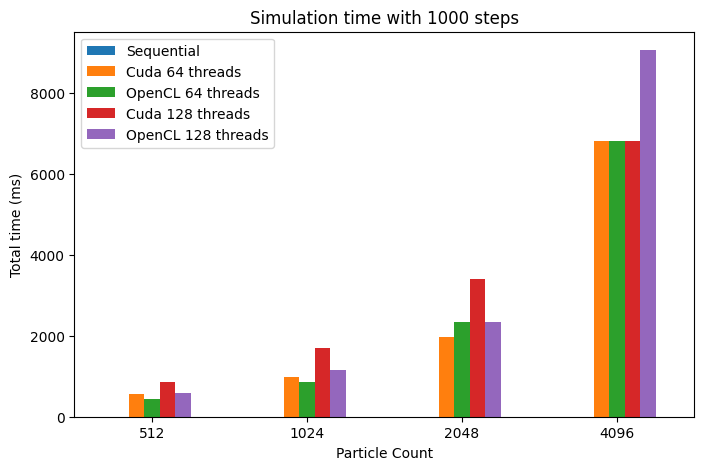

In [22]:
a1_2 = avgDf.loc[[512, 1024, 2048, 4096]].plot(kind='bar', rot=0, xlabel='Particle Count', ylabel='Total time (ms)', title='Simulation time with 1000 steps', figsize=(8, 5))

In [23]:
cudDf = pd.read_csv('out2Cuda.txt', sep=',')
cudIDf = pd.read_csv('out2CudaIrregular.txt', sep=',')
cudShDf = pd.read_csv('out2CudaShared.txt', sep=',')
cud2DDf = pd.read_csv('out2Cuda2D.txt', sep=',')

In [24]:
n = cudDf["n"].drop_duplicates().to_numpy()
avgDf = pd.DataFrame(columns=["Cuda default","Cuda 45 threads","Cuda shared memory","Cuda 2D threads"], index=n)

for i in n:
    print(i)
    avgCud = 0
    avgCud45 = 0
    avgCudSh = 0
    avgCud2d = 0

    for index, row in cudDf.loc[(cudDf["n"] == i)].iterrows():
        avgCud += row["time"]
    avgCud /= len(cudDf.loc[(cudDf["n"] == i)])
    avgCud /= 1000

    for index, row in cudIDf.loc[(cudIDf["n"] == i)].iterrows():
        avgCud45 += row["time"]
    avgCud45 /= len(cudIDf.loc[(cudIDf["n"] == i)])
    avgCud45 /= 1000

    for index, row in cudShDf.loc[(cudShDf["n"] == i)].iterrows():
        avgCudSh += row["time"]
    avgCudSh /= len(cudShDf.loc[(cudShDf["n"] == i)])
    avgCudSh /= 1000

    for index, row in cud2DDf.loc[(cud2DDf["n"] == i)].iterrows():
        avgCud2d += row["time"]
    avgCud2d /= len(cud2DDf.loc[(cud2DDf["n"] == i)])
    avgCud2d /= 1000

    avgDf.loc[i] = {"Cuda default": avgCud,"Cuda 45 threads": avgCud45,"Cuda shared memory": avgCudSh,"Cuda 2D threads": avgCud2d}

display(avgDf)

1024
2048
4096


,Cuda default,Cuda 45 threads,Cuda shared memory,Cuda 2D threads
1024,987.5132,850.8844,234.7262,844.7094
2048,1939.5934,2315.7366,920.9728,2318.2944
4096,6783.657,6800.444,8695.9752,6839.2512


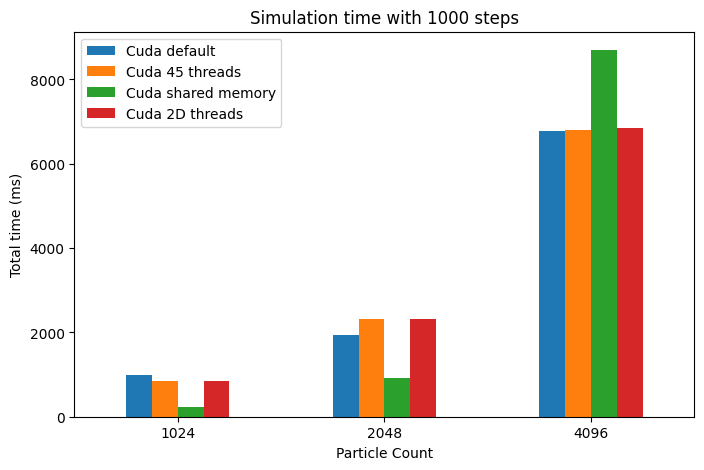

In [25]:
a2 = avgDf.plot(kind='bar', rot=0, xlabel='Particle Count', ylabel='Total time (ms)', title='Simulation time with 1000 steps', figsize=(8, 5))